# This is the data cleaning Notebok for the project

In [686]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

In [687]:
df = pd.read_excel("marketing_data.xlsx")

## Data Profiling

In [688]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

## Data Preprocessing

In [689]:
# Converting year of birth into age
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']
print(df[['Age', 'Year_Birth']])
print(df['Age'].unique())

      Age  Year_Birth
0      54        1970
1      63        1961
2      66        1958
3      57        1967
4      35        1989
...   ...         ...
2235   48        1976
2236   47        1977
2237   48        1976
2238   46        1978
2239   55        1969

[2240 rows x 2 columns]
[ 54  63  66  57  35  70  77  45  65  43  55  47  64  58  48  59  68  49
  53  38  52  50  34  37  40  56  69  41  51  46  72  62  60  42  61  67
  44  79  75  76  71  78  39  32  80  73  36  74  30  31  33 131  28  29
 125  81  83  84 124]


In [690]:
df['Marital_Status'] = df['Marital_Status'].astype(str)
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
Age                      int64
dtype: object

In [691]:
# Fixing the format for Dt_customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='mixed')
print(df.shape)
df = df[(df['Dt_Customer'].dt.year - df['Year_Birth']) > 18]
print(df.shape)
df['Dt_Customer'] = df['Dt_Customer'].astype(str)
print(df)

(2240, 23)
(2234, 23)
         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  MntSweetProducts  \
0            0  2014-06-16        0      

## Filling all null income values

In [692]:
df['Income'].head()

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64

In [693]:
# Graduation = df[df['Education'] == 'Graduation']
# Graduation.head(50)

unique_values = df['Education'].unique()
print(unique_values)

['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


In [694]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [695]:
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Alone', 'Divorced', 'Widow'], 'Single')
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd'], 'Married')

In [696]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Together'], dtype=object)

In [697]:
# function for totaling the number of family members
def countMembers(row):
    if row['Marital_Status'] == 'Single':
        return row['Kidhome'] + row['Teenhome'] + 1
    else:
        return row['Kidhome'] + row['Teenhome'] + 2

df['HouseHoldMembers'] = df.apply(countMembers, axis=1)

In [698]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [699]:
df['Education'] = df['Education'].replace(['2n Cycle'], 'n_Cycle')

In [700]:
Graduation_mean = df[df['Education'] == 'Graduation']
Graduation_mean = Graduation_mean['Income'].mean()
print(Graduation_mean)

52656.84290843806


In [701]:
PhD_mean = df[df['Education'] == 'PhD']
PhD_mean = PhD_mean['Income'].mean()
print(PhD_mean)

56145.31392931393


In [702]:
TwoN_Cycle_mean = df[df['Education'] == 'n_Cycle']
TwoN_Cycle_mean = TwoN_Cycle_mean['Income'].mean()
print(TwoN_Cycle_mean)

47488.649746192896


In [703]:
Master_mean = df[df['Education'] == 'Master']
Master_mean = Master_mean['Income'].mean()
print(Master_mean)

52917.53424657534


In [704]:
Basic_mean = df[df['Education'] == 'Basic']
Basic_mean = Basic_mean['Income'].mean()
print(Basic_mean)

20417.30188679245


In [705]:
df['Total_Children'] = df.loc[:, 'Kidhome'] + df.loc[:, 'Teenhome']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,HouseHoldMembers,Total_Children
0,1826,1970,Graduation,Single,84835.0,0,0,2014-06-16,0,189,...,1,4,4,6,1,1,0,54,1,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,1,7,3,7,5,1,0,63,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,1,3,2,5,2,0,0,66,3,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,1,1,0,2,7,0,0,57,4,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,2,3,1,2,7,1,0,35,2,1


In [706]:
null_income = df[df['Income'].isnull()]
# null_income = null_income.isnull().sum()
null_income['Income'][null_income['Education'] == 'Graduation'] = Graduation_mean
null_income['Income'][null_income['Education'] == 'PhD'] = PhD_mean
null_income['Income'][null_income['Education'] == 'n_Cycle'] = TwoN_Cycle_mean
null_income['Income'][null_income['Education'] == 'Master'] = Master_mean
null_income['Income'][null_income['Education'] == 'Basic'] = Basic_mean
print(null_income)

         ID  Year_Birth   Education Marital_Status        Income  Kidhome  \
134    8996        1957         PhD        Married  56145.313929        2   
262    1994        1983  Graduation        Married  52656.842908        1   
394    3769        1972         PhD       Together  56145.313929        1   
449    5255        1986  Graduation         Single  52656.842908        1   
525    8268        1961         PhD        Married  56145.313929        0   
590   10629        1973     n_Cycle        Married  47488.649746        1   
899   10475        1970      Master       Together  52917.534247        0   
997    9235        1957  Graduation         Single  52656.842908        1   
1096   4345        1964     n_Cycle         Single  47488.649746        1   
1185   7187        1969      Master       Together  52917.534247        1   
1213   8720        1978     n_Cycle       Together  47488.649746        0   
1312   8557        1982  Graduation         Single  52656.842908        1   

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_36200\2048718027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_income['Income'][null_income['Education'] == 'Graduation'] = Graduation_mean
C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_36200\2048718027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_income['Income'][null_income['Education'] == 'PhD'] = PhD_mean
C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_36200\2048718027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

In [707]:
df['Income'][df['Income'].isnull()] = null_income['Income']
df.head(50)

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_36200\140808848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'][df['Income'].isnull()] = null_income['Income']


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,HouseHoldMembers,Total_Children
0,1826,1970,Graduation,Single,84835.0,0,0,2014-06-16,0,189,...,1,4,4,6,1,1,0,54,1,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,1,7,3,7,5,1,0,63,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,1,3,2,5,2,0,0,66,3,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,1,1,0,2,7,0,0,57,4,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,2,3,1,2,7,1,0,35,2,1
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,1,4,7,5,2,1,0,66,1,0
6,4073,1954,n_Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,1,10,10,7,6,1,0,70,2,0
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,1,2,1,3,5,0,0,57,3,1
8,4047,1954,PhD,Married,65324.0,0,1,2014-11-01,0,384,...,3,6,2,9,4,0,0,70,3,1
9,9477,1954,PhD,Married,65324.0,0,1,2014-11-01,0,384,...,3,6,2,9,4,0,0,70,3,1


In [708]:
# Adding a column for the buying power of each customer
df['Total_Spent'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])
df['BuyingPower'] = df['Total_Spent'] / df['Income'] 

In [709]:
from scipy import stats


z_income = np.abs(stats.zscore(df['Income']))
z_age = np.abs(stats.zscore(df['Age']))
z_buying = np.abs(stats.zscore(df['BuyingPower']))


# z_buying_power = np.abs(stats.zscore(df['BuyingPower']))
print(z_buying)
threshold_z = 3


print("Original DataFrame Shape:", df.shape)
age_outlier_indices = np.where(z_age > threshold_z)[0]
income_outlier_indices = np.where(z_income > threshold_z)[0]
buying_indices = np.where(z_buying > threshold_z)[0]
# income_buying_power = np.where(z_income > threshold_z)[0]

outlier_indices = np.array(list(set(age_outlier_indices) | set(income_outlier_indices) | set(buying_indices)))

df = df.drop(outlier_indices)
print("DataFrame Shape after Removing Outliers:", df.shape)

0       0.246393
1       0.012664
2       0.367407
3       0.569665
4       0.337224
          ...   
2235    0.028043
2236    0.484279
2237    0.192074
2238    0.662810
2239    0.087549
Name: BuyingPower, Length: 2234, dtype: float64
Original DataFrame Shape: (2234, 27)
DataFrame Shape after Removing Outliers: (2221, 27)


In [710]:
df['BuyingPower'].head()

0    0.014027
1    0.010107
2    0.003731
3    0.000339
4    0.004238
Name: BuyingPower, dtype: float64

In [711]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
Age                    0
HouseHoldMembers       0
Total_Children         0
Total_Spent            0
BuyingPower            0
dtype: int64

## Saving the cleaned data

In [712]:
df.to_excel('Cleaned_Data.xlsx')

In [713]:
df.count()

ID                     2221
Year_Birth             2221
Education              2221
Marital_Status         2221
Income                 2221
Kidhome                2221
Teenhome               2221
Dt_Customer            2221
Recency                2221
MntWines               2221
MntFruits              2221
MntMeatProducts        2221
MntFishProducts        2221
MntSweetProducts       2221
MntGoldProds           2221
NumDealsPurchases      2221
NumWebPurchases        2221
NumCatalogPurchases    2221
NumStorePurchases      2221
NumWebVisitsMonth      2221
Response               2221
Complain               2221
Age                    2221
HouseHoldMembers       2221
Total_Children         2221
Total_Spent            2221
BuyingPower            2221
dtype: int64

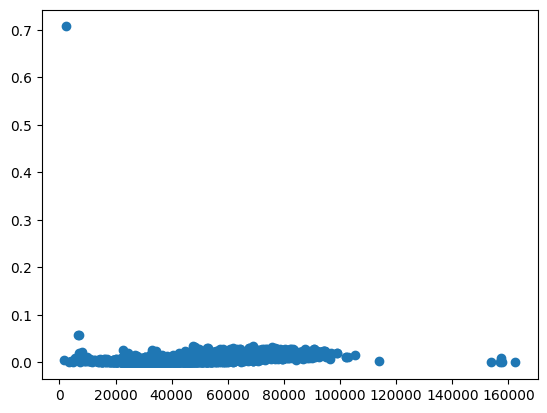

In [714]:
plt.scatter(df['Income'], df['BuyingPower'])

In [715]:
df['TotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [716]:
def calculate_days_diff(row):
  return (today - row['Dt_CustomerConverted']).days

df['Dt_CustomerConverted'] = pd.to_datetime(df['Dt_Customer'])
today = datetime.today()
df['SinceEnrolled'] = df.apply(calculate_days_diff, axis=1)

In [717]:
df['Interest'] = df['NumWebVisitsMonth'] + df['Recency'] 

In [718]:
df = df[df['BuyingPower']< 0.05]
# df = df[df['Income'] < 200000]
df.shape

(2218, 31)

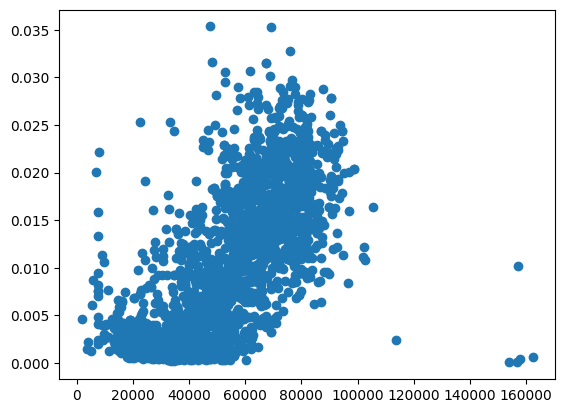

In [719]:
plt.scatter(df['Income'], df['BuyingPower'])    

### Customer Lifetime value

In [720]:
df['CLV'] = (df['Total_Spent'] / 2) * (df['SinceEnrolled'] / 365)

### Average Order Value

In [721]:
df['AOV'] = df['Total_Spent'] / df['TotalPurchases']

In [722]:
df = df[df['AOV'] < 1.7976931348623157e+308]

df.count()

ID                      2214
Year_Birth              2214
Education               2214
Marital_Status          2214
Income                  2214
Kidhome                 2214
Teenhome                2214
Dt_Customer             2214
Recency                 2214
MntWines                2214
MntFruits               2214
MntMeatProducts         2214
MntFishProducts         2214
MntSweetProducts        2214
MntGoldProds            2214
NumDealsPurchases       2214
NumWebPurchases         2214
NumCatalogPurchases     2214
NumStorePurchases       2214
NumWebVisitsMonth       2214
Response                2214
Complain                2214
Age                     2214
HouseHoldMembers        2214
Total_Children          2214
Total_Spent             2214
BuyingPower             2214
TotalPurchases          2214
Dt_CustomerConverted    2214
SinceEnrolled           2214
Interest                2214
CLV                     2214
AOV                     2214
dtype: int64

In [724]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2214 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    2214 non-null   int64         
 1   Year_Birth            2214 non-null   int64         
 2   Education             2214 non-null   object        
 3   Marital_Status        2214 non-null   object        
 4   Income                2214 non-null   float64       
 5   Kidhome               2214 non-null   int64         
 6   Teenhome              2214 non-null   int64         
 7   Dt_Customer           2214 non-null   object        
 8   Recency               2214 non-null   int64         
 9   MntWines              2214 non-null   int64         
 10  MntFruits             2214 non-null   int64         
 11  MntMeatProducts       2214 non-null   int64         
 12  MntFishProducts       2214 non-null   int64         
 13  MntSweetProducts      2

In [723]:
df.to_excel('Threshold_Data.xlsx')